In [159]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats
from scipy import sparse
%matplotlib inline

In [9]:
df = pd.read_csv("https://math189r.github.io/hw/data/classification.csv", sep = ',')

In [19]:
X = df.as_matrix()
y = X[:,-1]
X = X[:,0:-1]

# Newton's Method

In [117]:
def gradient(weights, reg):
    return X.T @ (sigmoid(X @ weights) - y) + reg * weights

def newtstep(weights, reg):
    mu = sigmoid(X @ weights)
    mudiag = X.T @ sparse.diags(mu * (1 - mu)) @ X + sparse.eye(X.shape[1])
    return np.linalg.solve(mudiag, gradient(weights, reg))

def sigmoid(x):
    return 1. / (1 + np.exp(x))

def RMSE(weights):
    diff = sigmoid(X @ weights) - y
    return 1. / X.shape[0] * (diff.T @ diff)**.5

def newtdescent(its, reg, printfreq = 10000):
    weights = np.random.randn(X.shape[1])
    for i in range(its):
        weights += newtstep(weights, reg)
        if i % printfreq == 0:
            print(RMSE(weights))
    return weights

In [118]:
w_star = newtdescent(15, 0, 1)

0.0251077286205
0.0248335925097
0.0248106439549
0.024807881859
0.0248070961764
0.0248068457059
0.024806772886
0.0248067531102
0.0248067479504
0.0248067466349
0.024806746304
0.0248067462215
0.024806746201
0.0248067461959
0.0248067461947


# Get posterior

In [119]:
S = np.diag(sigmoid(X @ w_star))
V0 = np.eye(X.shape[1])
H = X.T @ S @ X - V0

# Plot Posterior Distribution

In [127]:
mvpdf = lambda x, mu, cov: stats.multivariate_normal.pdf(x, mu, cov)
mu = w_star
cov = np.linalg.inv(H)

# multi-variate normal density
def mvdense(mu, cov):
    density = np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            density[i,j] = mvpdf([i/10 -5, j/10 - 5], mu, cov)
    return density

# multi-variate plot
def mvdenseplt(mu, cov):
    plt.figure(figsize=(10,10))
    plt.title("mu = " +  str(mu))
    plt.imshow(mvdense(mu,cov)**.05)
    plt.xlabel("x from -10 to 10")
    plt.ylabel("y from -10 to 10")
    plt.xticks([])
    plt.yticks([])

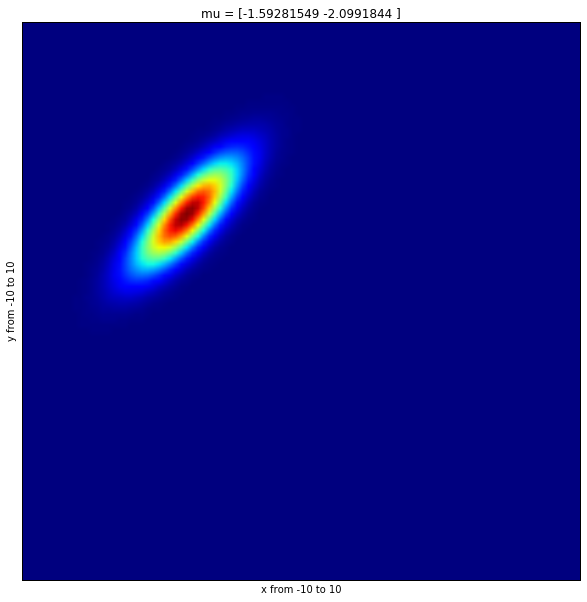

In [128]:
mvdenseplt(mu, cov)

# Monte Carlo Approx

In [150]:
def predict(w, X, its):
    
    total = sigmoid(X @ w)
    for i in range(its - 1):
        weights = np.random.multivariate_normal(mu, cov) # draw weights
        total += sigmoid(X @ weights)
        
    return total / its

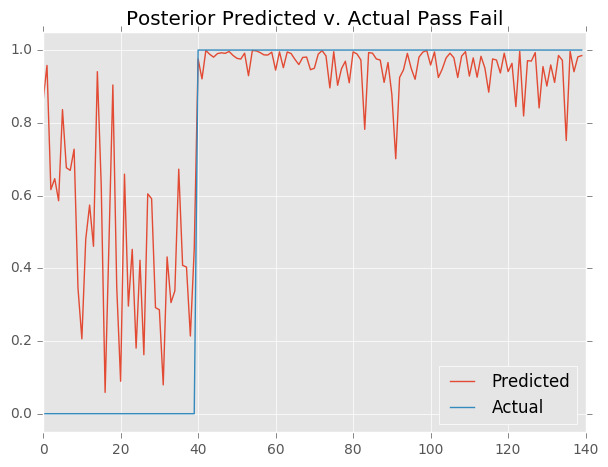

In [163]:
plt.style.use('ggplot')
predictions = predict(w_star, X, 100)
plt.figure(figsize = (7,5))
plt.plot(predictions, label = "Predicted")
plt.plot(y, label = "Actual")
plt.ylim(-.05,1.05)
plt.legend(loc=4)
plt.title("Posterior Predicted v. Actual Pass Fail")